In [2]:
from PosSelect_Functions_Old import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import pandas as pd
import numpy as np
import copy
import seaborn as sns
from scipy.stats import mannwhitneyu as mwu
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import wilcoxon
from scipy.optimize import curve_fit
from scipy.stats import fisher_exact
from scipy.stats import norm

hfont = {'fontname':'Arial'}
plt.rcParams["font.family"] = "Arial"

#Code borrowed heavily from here: https://stackoverflow.com/questions/62375034/find-non-overlapping-area-between-two-kde-plots
plt.rcParams.update(
    {"text.usetex": False}
)

def parse_table(i):
    return [int(x) for x in i.replace("[", "").replace("]", "").split(",")]

C:\Users\astar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


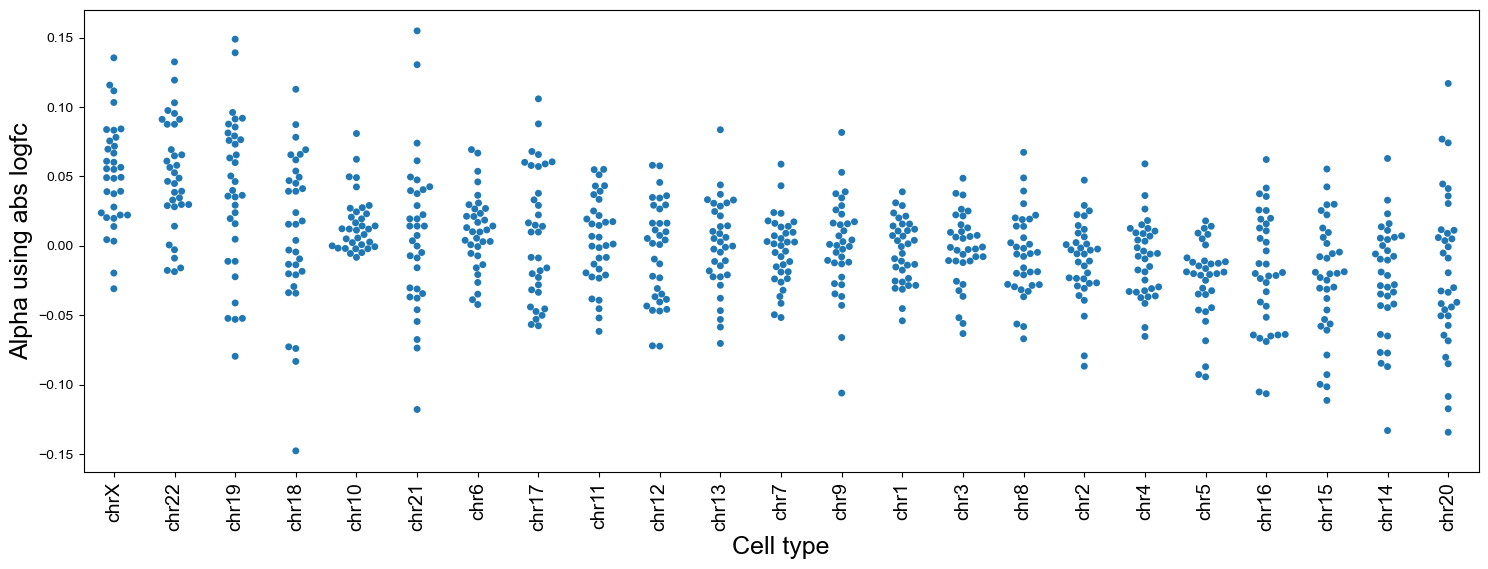

In [34]:
import os
df = pd.DataFrame()
out = []
for file in os.listdir("PerChrom_Results"):
    if "Bootstrap" not in file and "PhyloP" not in file and "FilterNewTEs" in file:
        
        x = pd.read_csv("PerChrom_Results/" + file, sep = "\t")
        x = x[x["Proportion"] == 0.99]
        x["CellType"] = np.repeat(file.split("_")[1].replace(".txt", "").replace("KosoyRoussosControl", "").replace("LiangStein", "FetalCortical"), x.shape[0])
        out.append([file.split("_")[1].replace(".txt", "").replace("KosoyRoussosControl", "").replace("LiangStein", "FetalCortical").replace("", np.median(x["alpha"])])
        df = pd.concat([df, x])

medians = []
for chrom in np.unique(df["Chrom"]):
    dff = df[df["Chrom"].isin([chrom])]
    medians.append([chrom, np.median(dff["alpha"])])
df_med = pd.DataFrame(medians).sort_values(1, ascending = False)
order = list(df_med[0])
fig, ax = plt.subplots(figsize = (18, 6))
sns.swarmplot(data = df, x = "Chrom", y = "alpha", hue = "CellType", order = order)
#plt.title("Neuron")

plt.xlabel("Cell type", fontsize = 18)
plt.ylabel("Alpha using abs logfc", fontsize = 18)
plt.xticks(rotation = 90, fontsize = 14)
plt.legend([], [], frameon = False)

In [6]:
bleh = pd.DataFrame(out)
bleh.sort_values(1)

,0,1
21,FilterNewTEs,-0.050765
19,FilterNewTEs,-0.048326
20,FilterNewTEs,-0.036983
0,FilterNewTEs,-0.036564
28,FilterNewTEs,-0.033417
7,FilterNewTEs,-0.030915
5,FilterNewTEs,-0.022128
6,FilterNewTEs,-0.018577
18,FilterNewTEs,-0.017480
3,FilterNewTEs,-0.017228


In [35]:
import os
df = pd.DataFrame()
for file in os.listdir("PerChrom_Results"):
    if "Bootstrap" in file and "FilterNewTEs" in file:
        
        x = pd.read_csv("PerChrom_Results/" + file, sep = "\t")
        x = x[x["Proportion"] == 0.99]
        x["CellType"] = np.repeat(file.split("_")[2].replace(".txt", "").replace("KosoyRoussosControl", "").replace("LiangStein", "FetalCortical"), x.shape[0])
        df = pd.concat([df, x])



In [18]:
df

,Chrom,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion,Iteration,CellType
371,chr19,0.021791,159552,0.021553,49884,9.917351e-09,2.402792e-02,5.023660e-09,0.012014,0.092081,0.075226,"[[17399, 142153], [4988, 44896]]","[[17399, 142153], [4990, 44894]]",0.9,129,AdultHeartSmoothMuscle
448,chr19,0.021720,159552,0.021611,49884,6.222353e-08,5.170621e-02,3.132700e-08,0.025853,0.087272,0.075511,"[[17319, 142233], [4988, 44896]]","[[17319, 142233], [4991, 44893]]",0.9,130,AdultHeartSmoothMuscle
497,chr19,0.021748,159552,0.021557,49884,1.266793e-07,2.009919e-02,6.432668e-08,0.010050,0.085309,0.075368,"[[17279, 142273], [4986, 44898]]","[[17279, 142273], [4989, 44895]]",0.9,329,AdultHeartSmoothMuscle
656,chr19,0.021667,159552,0.021364,49884,1.552519e-06,2.894340e-02,7.820402e-07,0.014472,0.077990,0.075383,"[[17160, 142392], [4988, 44896]]","[[17160, 142392], [4989, 44895]]",0.9,181,AdultHeartSmoothMuscle
668,chr19,0.021856,159552,0.022136,49884,1.863444e-06,7.113008e-01,9.400536e-07,0.644350,0.077430,0.076208,"[[17149, 142403], [4987, 44897]]","[[17149, 142403], [4989, 44895]]",0.9,184,AdultHeartSmoothMuscle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159364,chr17,0.030618,237989,0.031209,68364,3.024436e-05,1.577441e-02,9.999854e-01,0.992113,-0.062840,0.117590,"[[22522, 215467], [6834, 61530]]","[[22522, 215467], [6837, 61527]]",0.9,246,VIP
159674,chr15,0.028948,277458,0.029983,80886,1.456231e-06,5.396906e-09,9.999993e-01,1.000000,-0.066991,0.116381,"[[26171, 251287], [8088, 72798]]","[[26171, 251287], [8091, 72795]]",0.9,240,VIP
159875,chr21,0.029503,131283,0.029990,38838,4.475109e-04,2.127878e-01,9.997871e-01,0.893606,-0.070792,0.119721,"[[12341, 118942], [3883, 34955]]","[[12341, 118942], [3884, 34954]]",0.9,817,VIP
160156,chr22,0.032864,117778,0.034038,35665,2.380457e-04,4.628884e-04,9.998857e-01,0.999769,-0.077809,0.126075,"[[11007, 106771], [3566, 32099]]","[[11007, 106771], [3567, 32098]]",0.9,601,VIP


AMY 0.0122815910593784 0.140670217711296
ASCT -0.0564067566996465 0.1028239412109187
AdultHeartSmoothMuscle -0.0433524588598989 0.1200617312696984
AdultHeartVentricularCardiomyocyte -0.0968972797322209 0.042829013238767
AdultLoopOfHenle -0.0935501851365905 0.0669861132551291
AdultProximalTubule -0.0439525451469029 0.0885912893592822
D1Pu -0.0527319030039425 0.1032685507733857
FetalArterialECs -0.043652416569704 0.0813558892855948
FetalBrainCOP -0.0448539575440999 0.1059272520036635
FetalBrainFloorPlate 0.031272676604179 0.1835039070891747
FetalBrainNeurCB -0.0088126153574837 0.1168392935915453
FetalBrainNeurDAergic -0.0376855341543853 0.1275763465417042
FetalBrainNeurDRG 0.045503385044884 0.1720611923136544
FetalBrainNeurGlioblast -0.0527319030039425 0.0961747105225304
FetalBrainNeurPurkinje -0.0035612500515185 0.1401223828295102
FetalBrainNeurSerotonergic -0.0509029998349236 0.1029705766619177
FetalBrainRoofPlate -0.0153512886507589 0.1217708763233821
FetalChondrocytes 0.0163355813152

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, 'Microglia'),
  Text(1, 0, 'ITL23'),
  Text(2, 0, 'FetalBrainFloorPlate'),
  Text(3, 0, 'FetalBrainNeurDRG'),
  Text(4, 0, 'FetalCorticalProgenitor'),
  Text(5, 0, 'FetalCorticalNeuron'),
  Text(6, 0, 'FetalChondrocytes'),
  Text(7, 0, 'FetalGonadImmuneFemale'),
  Text(8, 0, 'FetalBrainNeurPurkinje'),
  Text(9, 0, 'FetalLeydigMale'),
  Text(10, 0, 'AMY'),
  Text(11, 0, 'PhyloP447'),
  Text(12, 0, 'SertoliMale'),
  Text(13, 0, 'NeuralFemale'),
  Text(14, 0, 'FetalBrainRoofPlate'),
  Text(15, 0, 'FetalBrainNeurCB'),
  Text(16, 0, 'FetalHeartPericytes'),
  Text(17, 0, 'VIP'),
  Text(18, 0, 'PVALB'),
  Text(19, 0, 'FetalBrainCOP'),
  Text(20, 0, 'AdultHeartSmoothMuscle'),
  Text(21, 0, 'OGC'),
  Text(22, 0, 'FetalBrainNeurDAergic'),
  Text(23, 0, 'SST'),
  Text(24, 0, 'FetalArter

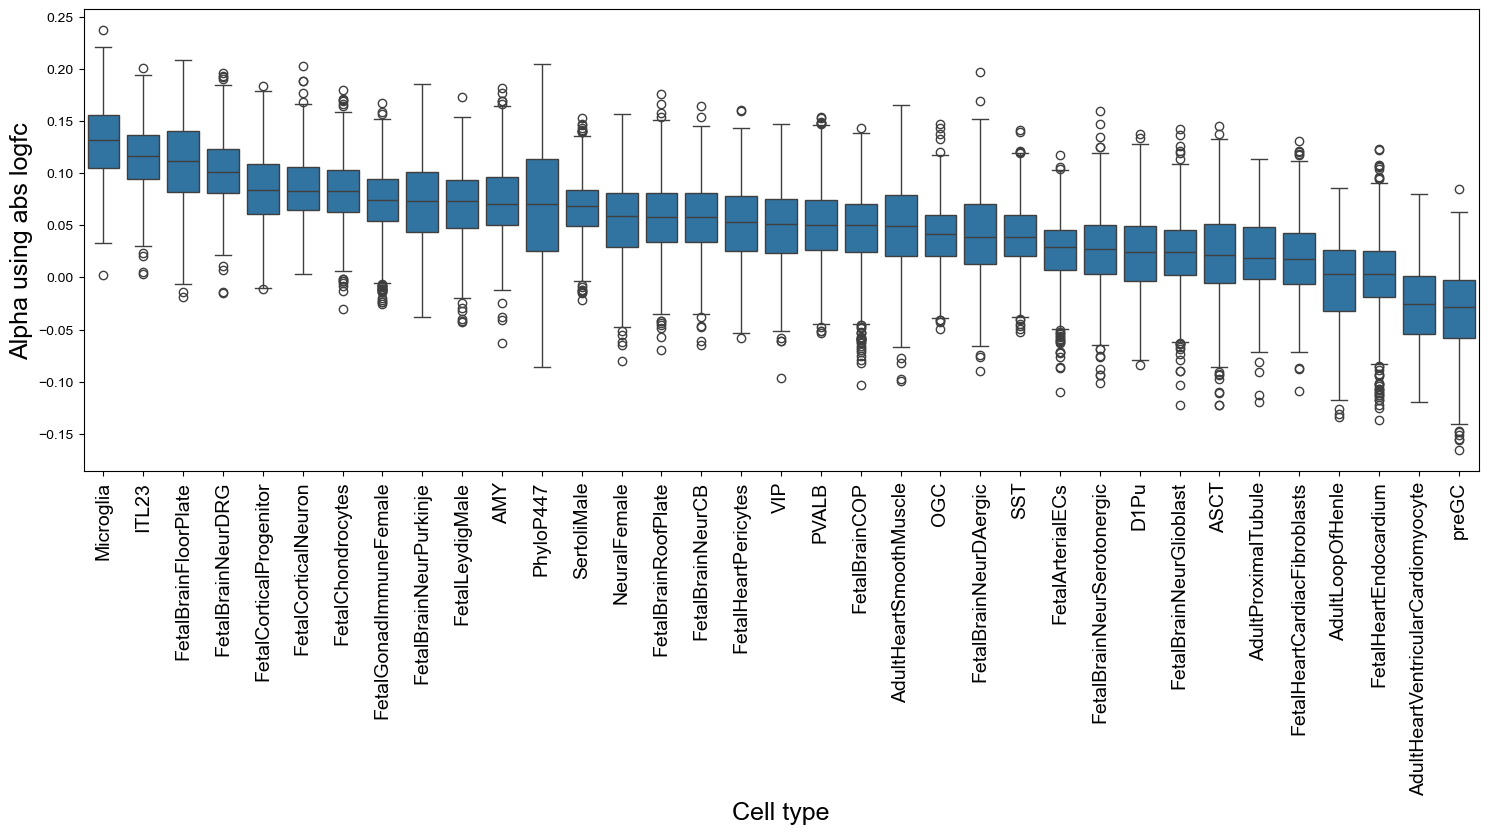

In [37]:
dfp = df[df["Chrom"] == "chrX"]

medians = []
for chrom in np.unique(dfp["CellType"]):
    dff = dfp[dfp["CellType"].isin([chrom])]
    dff = dff.sort_values("alpha")
    print(chrom, list(dff["alpha"])[25], list(dff["alpha"])[975])
    medians.append([chrom, np.median(dff["alpha"])])
df_med = pd.DataFrame(medians).sort_values(1, ascending = False)
order = list(df_med[0])


fig, ax = plt.subplots(figsize = (18, 6))
sns.boxplot(data = dfp, x = "CellType", y = "alpha", order = order)
#plt.title("Neuron")

plt.xlabel("Cell type", fontsize = 18)
plt.ylabel("Alpha using abs logfc", fontsize = 18)
plt.xticks(rotation = 90, fontsize = 14)

In [41]:
x = pd.read_csv("PerChrom_Results/PerChrom_KosoyRoussosControlMicroglia_abs_logfc_SpecSup0_MAFCut0.25.txt", sep = "\t")
x[x["Proportion"] == 0.5].sort_values("alpha")

,Chrom,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion
157,chr19,0.011606,166690,0.012318,54269,1.492952e-17,1.785479e-21,1.000000e+00,1.000000e+00,-0.087984,0.012318,"[[79833, 86857], [27134, 27135]]","[[79833, 86857], [27135, 27134]]",0.5
149,chr20,0.011686,231004,0.011993,64747,3.302944e-05,1.723203e-05,9.999839e-01,9.999914e-01,-0.037629,0.011993,"[[113369, 117635], [32373, 32374]]","[[113369, 117635], [32374, 32373]]",0.5
145,chr17,0.012166,244289,0.012341,71883,1.641395e-02,1.586989e-02,9.919529e-01,9.920651e-01,-0.020599,0.012341,"[[120901, 123388], [35941, 35942]]","[[120901, 123388], [35943, 35940]]",0.5
141,chr22,0.010417,120941,0.010550,37532,1.266572e-01,1.294051e-01,9.377965e-01,9.352975e-01,-0.018253,0.010550,"[[59922, 61019], [18765, 18767]]","[[59922, 61019], [18766, 18766]]",0.5
128,chr11,0.013329,481541,0.013452,141091,3.564685e-02,3.794536e-02,9.823803e-01,9.810273e-01,-0.012812,0.013452,"[[239238, 242303], [70545, 70546]]","[[239238, 242303], [70546, 70545]]",0.5
105,chr9,0.013762,418975,0.013813,125123,4.196564e-01,2.795404e-01,7.914604e-01,8.602298e-01,-0.005222,0.013813,"[[208942, 210033], [62561, 62562]]","[[208942, 210033], [62562, 62561]]",0.5
104,chr10,0.013331,491769,0.013377,144344,3.960637e-01,2.177010e-01,8.032210e-01,8.911495e-01,-0.005103,0.013377,"[[245256, 246513], [72171, 72173]]","[[245258, 246511], [72172, 72172]]",0.5
100,chr7,0.014473,567637,0.014493,169543,7.148661e-01,8.827294e-01,6.444795e-01,4.413647e-01,-0.002037,0.014493,"[[283527, 284110], [84770, 84773]]","[[283529, 284108], [84772, 84771]]",0.5
97,chr16,0.011857,298889,0.011867,85793,8.952314e-01,4.151581e-01,5.547865e-01,7.924210e-01,-0.001038,0.011867,"[[149367, 149522], [42896, 42897]]","[[149367, 149522], [42897, 42896]]",0.5
85,chr21,0.014381,134109,0.014364,40714,8.763472e-01,3.202284e-01,4.391020e-01,1.601142e-01,0.001797,0.014364,"[[67111, 66998], [20355, 20359]]","[[67112, 66997], [20357, 20357]]",0.5
